<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Simakhina%20Evgeniya/POOR_BAD_AREAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

СЕГМЕНТАЦИЯ БЕЗКАПУСТНЫХ ОБЛАСТЕЙ ЗЕМЛИ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск

Mounted at /content/drive


In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
import os
from IPython.display import Image
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

results = model.train(data='/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml', epochs=20, imgsz=640)


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

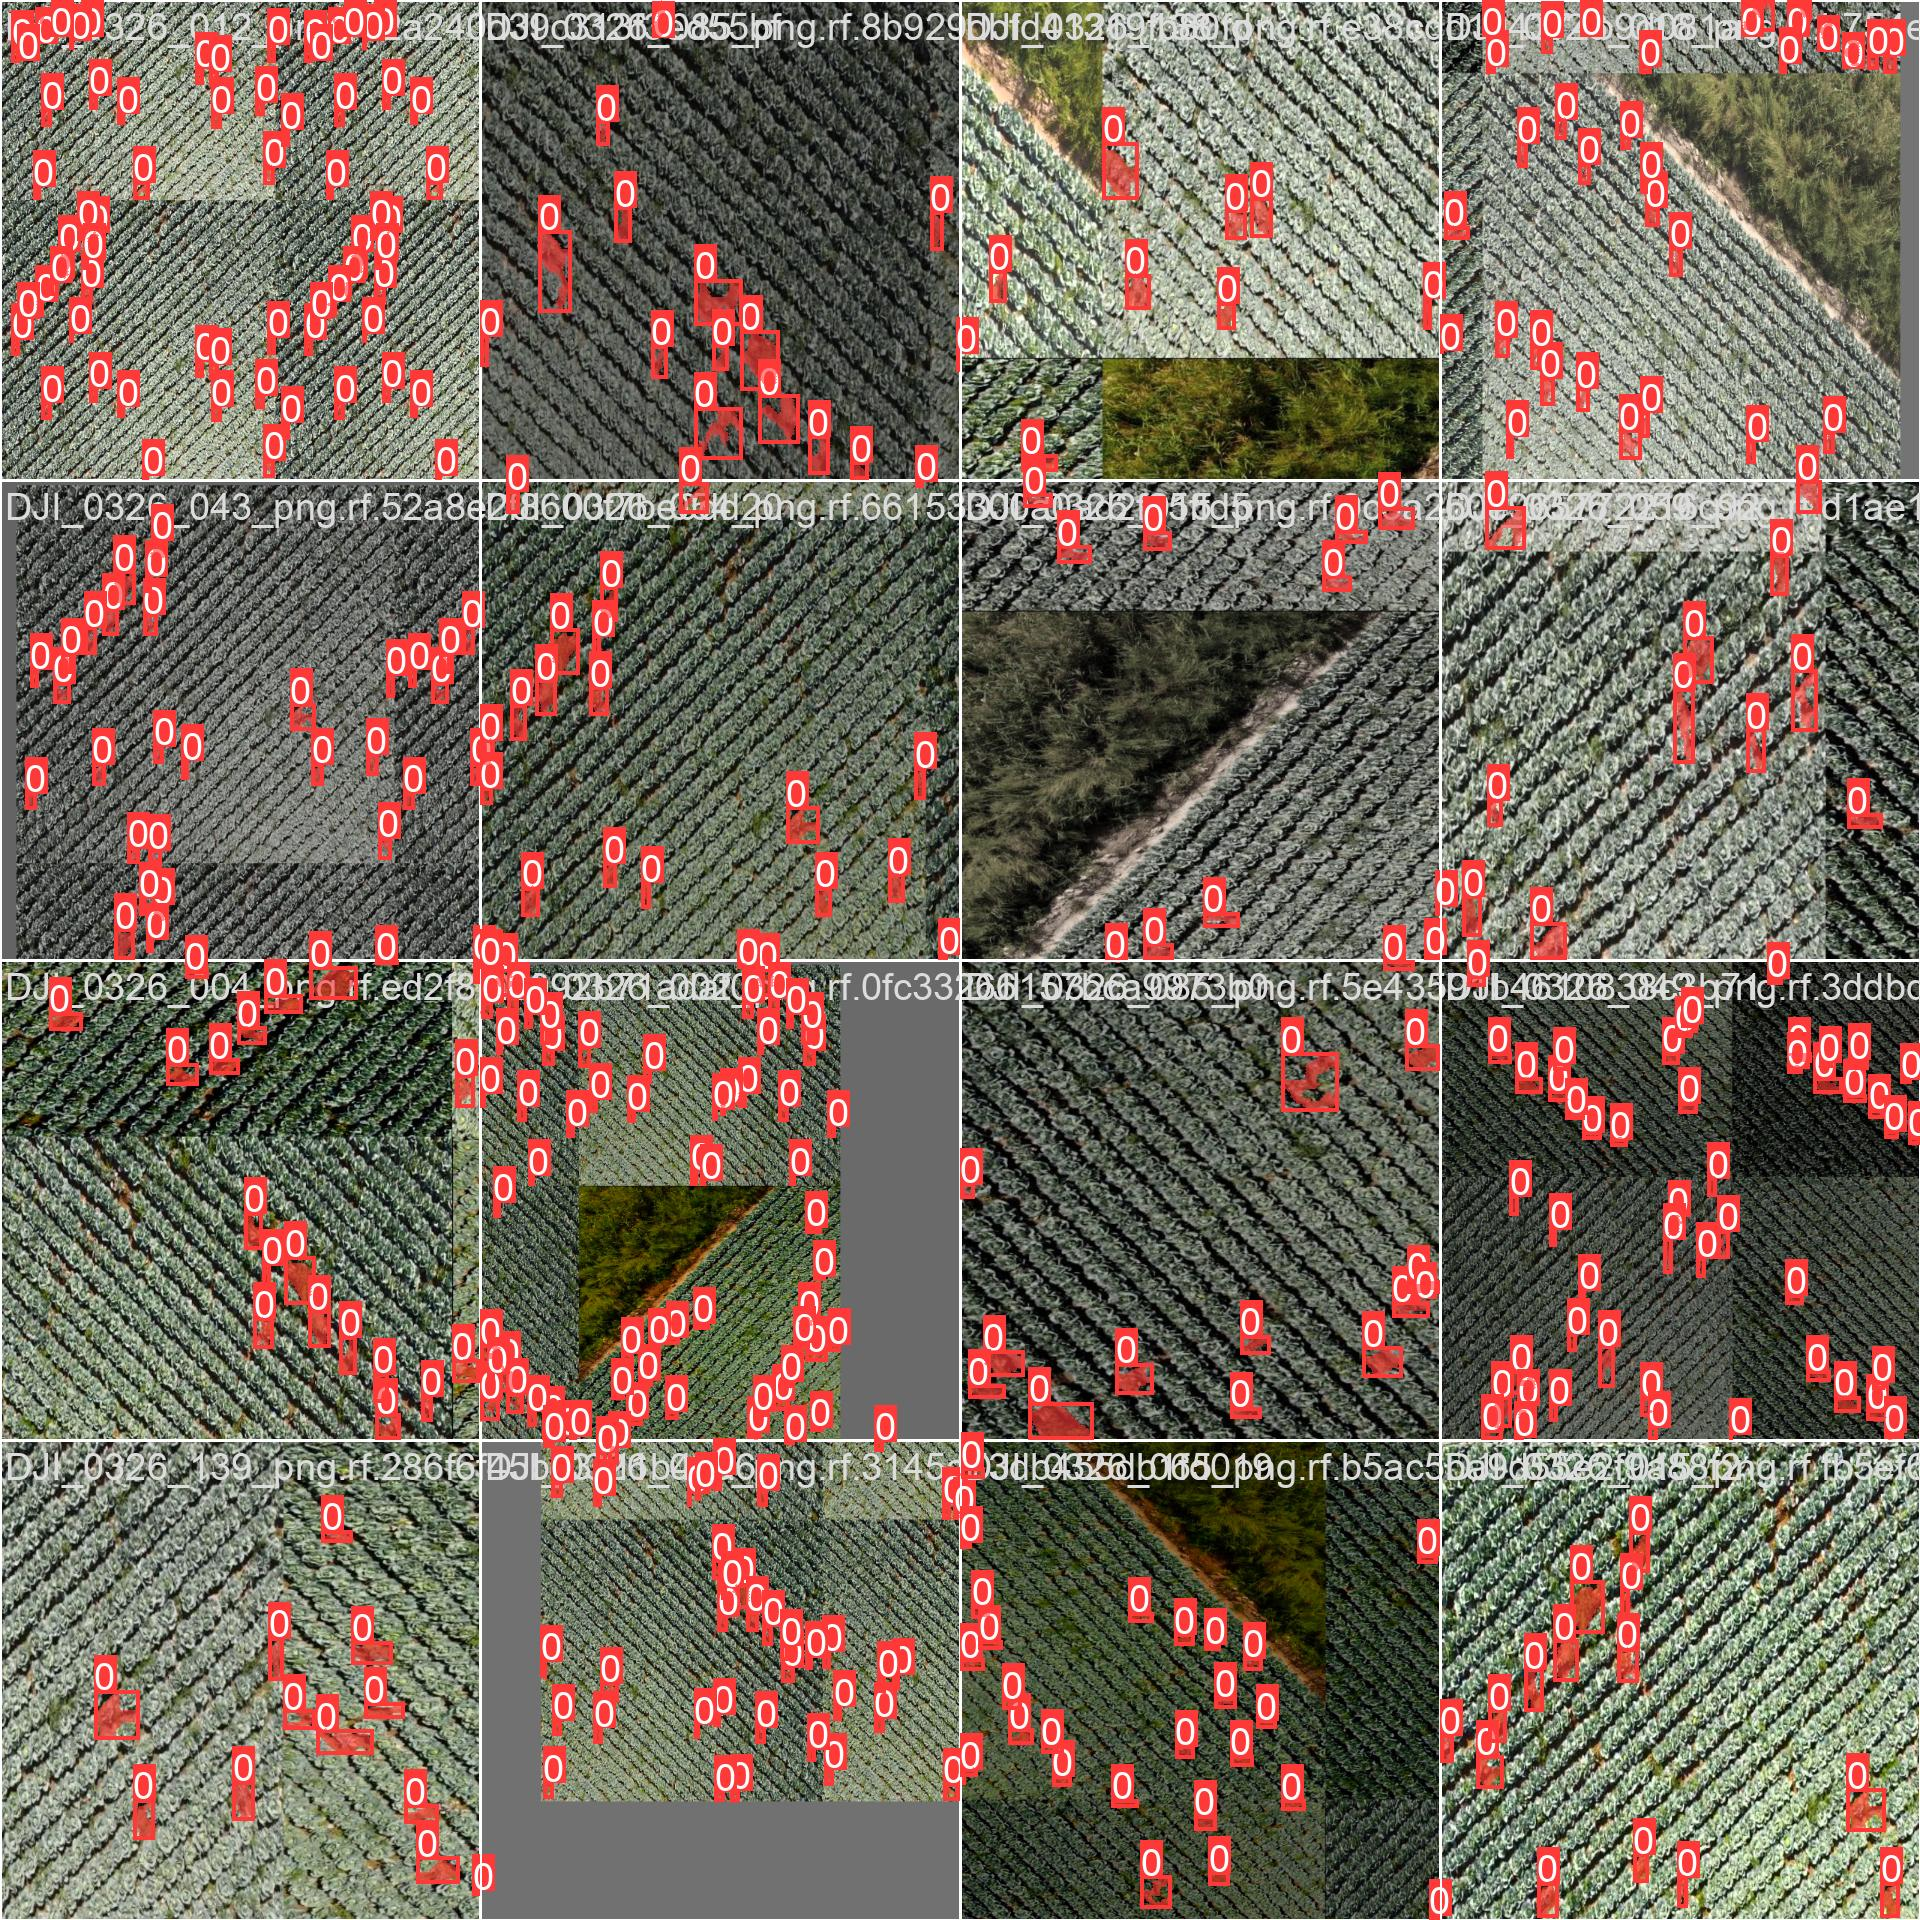

In [ ]:
# Вывести итог обучения
from IPython.display import Image
Image(filename='/content/runs/segment/train2/train_batch0.jpg', height=600)


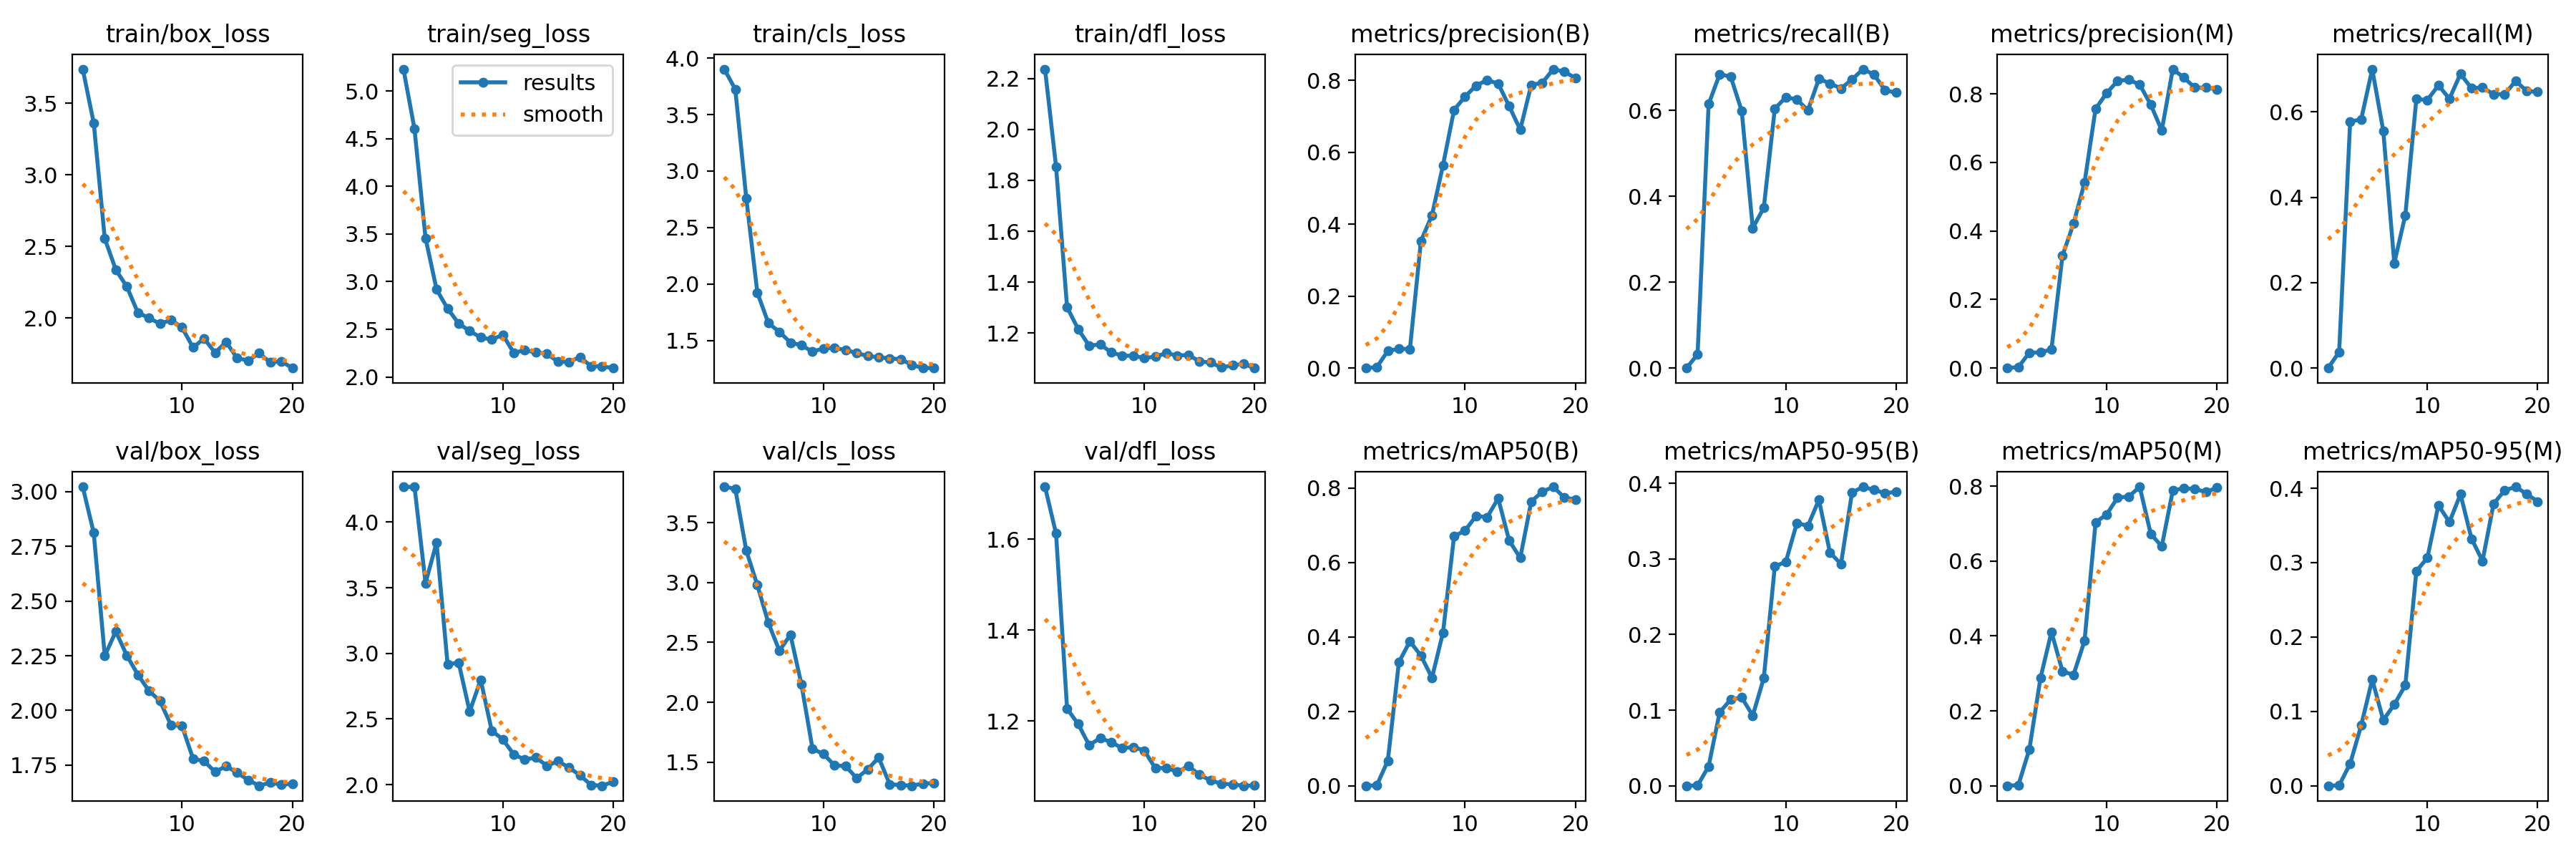

In [ ]:
Image(filename='/content/runs/segment/train2/results.png', height=600)

In [ ]:
model = YOLO("/content/runs/segment/train2/weights/best.pt")
#сохранение весов, чтобы не учить после перезагрузки колаба:

import shutil

# Путь к исходному файлу
source_path = '/content/runs/segment/train2/weights/best.pt'

# Путь к целевой папке на Google Диске
target_path = '/content/drive/MyDrive/'

# Копирование файла на Google Диск
shutil.copy(source_path, target_path)

'/content/drive/MyDrive/best.pt'

In [ ]:
# Восстановление модели с лучшими весами

model = YOLO('/content/drive/MyDrive/best.pt')

In [ ]:
# валидация, проверка

model.val(data="/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/data.yaml", conf=0.5)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                   all          8        187      0.983       0.31      0.647      0.386      0.983       0.31      0.647      0.401
Speed: 0.4ms preprocess, 8.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/segment/val3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cac67f8c910>
fitness: 0.8377847796642552
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([    0.78707])
names: {0: 'poor_land'}
plot: True
results_dict: {'metrics/precision(B)': 0.9830508474576272, 'metrics/recall(B)': 0.31016042780748665, 'metrics/mAP50(B)': 0.6471116279069767, 'metrics/mAP50-95(B)': 0.3863000960893145, 'metrics/precision(M)': 0.9830508474576272, 'metrics/recall(M)': 0.31016042780748665, 'metrics/mAP50(M)': 0.6471116279069767, 'metrics/mAP50-95(M)': 0.40076929733608535, 'fitness': 0.8377847796642552}
save_dir: PosixPath('runs/segment/val3')
seg: ultralytics.utils.metrics.Metric object
speed: {'preprocess': 0.3787279

In [ ]:
# Предикт на картинке

results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg")


image 1/1 /content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg: 640x640 20 poor_lands, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


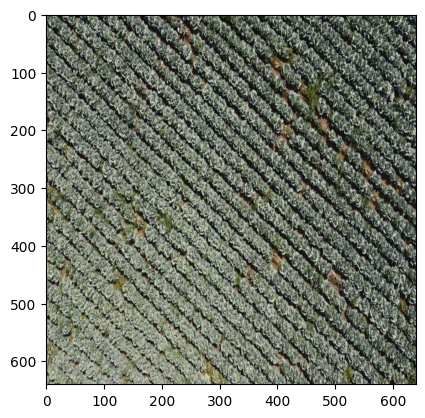

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Берем то что выше вывелось и подставляем сюда:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Bad area on the cabbage field.v1i.yolov8/test/images/DJI_0326_010_png.rf.707603814503dcec1617a5274493bad8.jpg')

# отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()